In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

In [4]:

def get_val_frac(s: pd.Series, numb: float = 1) -> float:
    """
    Get the fraction of a column that is equal to a certain number.
    """
    return (s == numb).sum().sum() / len(s)


In [5]:
all_mlde = pd.read_csv("results/mlde/vis_5/all_df.csv")

In [6]:
ds_none = all_mlde[(all_mlde["n_mut_cutoff"] == "double") & (all_mlde["zs"] == "none") & (all_mlde["encoding"] == "one-hot") & (all_mlde["n_sample"] == 384)]
ds_none

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1488400,one-hot,boosting,384,1141,0,0.912093,0.202175,1.000000,0.513011,0.923561,0.364294,1.0,13.0,double,DHFR,none,384,max
1488401,one-hot,boosting,384,1141,1,0.968084,0.202385,1.000000,0.458407,0.912321,0.356716,1.0,28.0,double,DHFR,none,384,max
1488402,one-hot,boosting,384,1141,2,0.896570,0.189625,1.000000,0.469322,0.926172,0.340823,1.0,44.0,double,DHFR,none,384,max
1488403,one-hot,boosting,384,1141,3,0.979085,0.200090,1.000000,0.478305,0.921073,0.351363,1.0,28.0,double,DHFR,none,384,max
1488404,one-hot,boosting,384,1141,4,0.851395,0.168595,1.000000,0.529717,0.947152,0.352706,1.0,210.0,double,DHFR,none,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556995,one-hot,ridge,384,2243,95,0.521942,-0.085404,0.932034,0.464569,0.987598,0.235435,0.0,421.0,double,TrpB4,none,96,max
1556996,one-hot,ridge,384,2243,96,0.521305,0.006981,0.746142,0.379981,0.983486,0.222060,0.0,595.0,double,TrpB4,none,96,max
1556997,one-hot,ridge,384,2243,97,0.504379,-0.051637,0.749107,0.426177,0.985912,0.232639,0.0,2272.0,double,TrpB4,none,96,max
1556998,one-hot,ridge,384,2243,98,0.508295,0.005136,0.742180,0.428592,0.984976,0.219837,0.0,3139.0,double,TrpB4,none,96,max


In [7]:
new_ds_zs = pd.read_csv("results/mlde_hm2zs/vis/all_df.csv")

In [8]:
merge_ds_df = pd.concat([new_ds_zs, ds_none])
merge_ds_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,24,600,0,0.351060,0.142056,0.340514,0.152066,0.667157,0.108322,0.0,1251.0,double,DHFR,Triad_score,384,max
1,one-hot,boosting,24,600,1,0.558462,0.166955,0.982530,0.172702,0.708021,0.217912,0.0,4189.0,double,DHFR,Triad_score,384,max
2,one-hot,boosting,24,600,2,0.789152,0.177189,1.000000,0.396359,0.840700,0.240218,1.0,292.0,double,DHFR,Triad_score,384,max
3,one-hot,boosting,24,600,3,0.574820,0.178027,0.959943,0.169563,0.738721,0.143456,0.0,3415.0,double,DHFR,Triad_score,384,max
4,one-hot,boosting,24,600,4,0.697498,0.167603,0.847249,0.163959,0.779970,0.211567,0.0,5700.0,double,DHFR,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556995,one-hot,ridge,384,2243,95,0.521942,-0.085404,0.932034,0.464569,0.987598,0.235435,0.0,421.0,double,TrpB4,none,96,max
1556996,one-hot,ridge,384,2243,96,0.521305,0.006981,0.746142,0.379981,0.983486,0.222060,0.0,595.0,double,TrpB4,none,96,max
1556997,one-hot,ridge,384,2243,97,0.504379,-0.051637,0.749107,0.426177,0.985912,0.232639,0.0,2272.0,double,TrpB4,none,96,max
1556998,one-hot,ridge,384,2243,98,0.508295,0.005136,0.742180,0.428592,0.984976,0.219837,0.0,3139.0,double,TrpB4,none,96,max


In [9]:
merge_ds_df["n_sample"].unique()

array([ 24,  48, 384])

In [10]:
avg_df = (
    merge_ds_df[["lib", "zs", "top_maxes", "ft_lib"]]
    .groupby(["lib", "zs", "ft_lib"])
    .agg(["mean", "std", get_val_frac])
    .rename(columns={"get_val_frac": "frac"})
    .reset_index()
)
avg_df.columns = ["_".join(filter(None, col)).strip().replace("top_maxes_", "") for col in avg_df.columns.values]
avg_df

,lib,zs,ft_lib,mean,std,frac
0,DHFR,Triad_score,150,0.362087,0.131963,0.000
1,DHFR,Triad_score,300,0.861714,0.031511,0.005
2,DHFR,Triad_score,600,0.956709,0.079816,0.515
3,DHFR,esm_score,150,0.968923,0.056568,0.640
4,DHFR,esm_score,300,0.971914,0.053451,0.560
...,...,...,...,...,...,...
345,TrpB4,struc-comb_score,600,0.800018,0.062588,0.030
346,TrpB4,struc-comb_score,1200,0.842424,0.102853,0.200
347,TrpB4,structnmsa-comb_score,300,0.829045,0.051943,0.000
348,TrpB4,structnmsa-comb_score,600,0.789203,0.061380,0.030


In [11]:
avg_df[avg_df["lib"] == "DHFR"]["zs"].unique()

array(['Triad_score', 'esm_score', 'esmif_score', 'ev_score',
       'msa-comb_score', 'msanoif-comb_score', 'none', 'struc-comb_score',
       'structnmsa-comb_score'], dtype=object)

In [18]:
avg_df[avg_df["lib"] == "DHFR"]["ft_lib"].unique()

array([ 150,  300,  600, 1141])

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
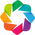

In [13]:
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)

from SSMuLA.vis import (
    LIB_COLORS,
    PRESENTATION_PALETTE_SATURATE,
    MLDE_COLORS,
    ZS_COLOR_MAP,
    save_plt,
    save_bokeh_hv,
    JSON_THEME,
    one_decimal_x,
    one_decimal_y,
    fixmargins,
)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:

FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]


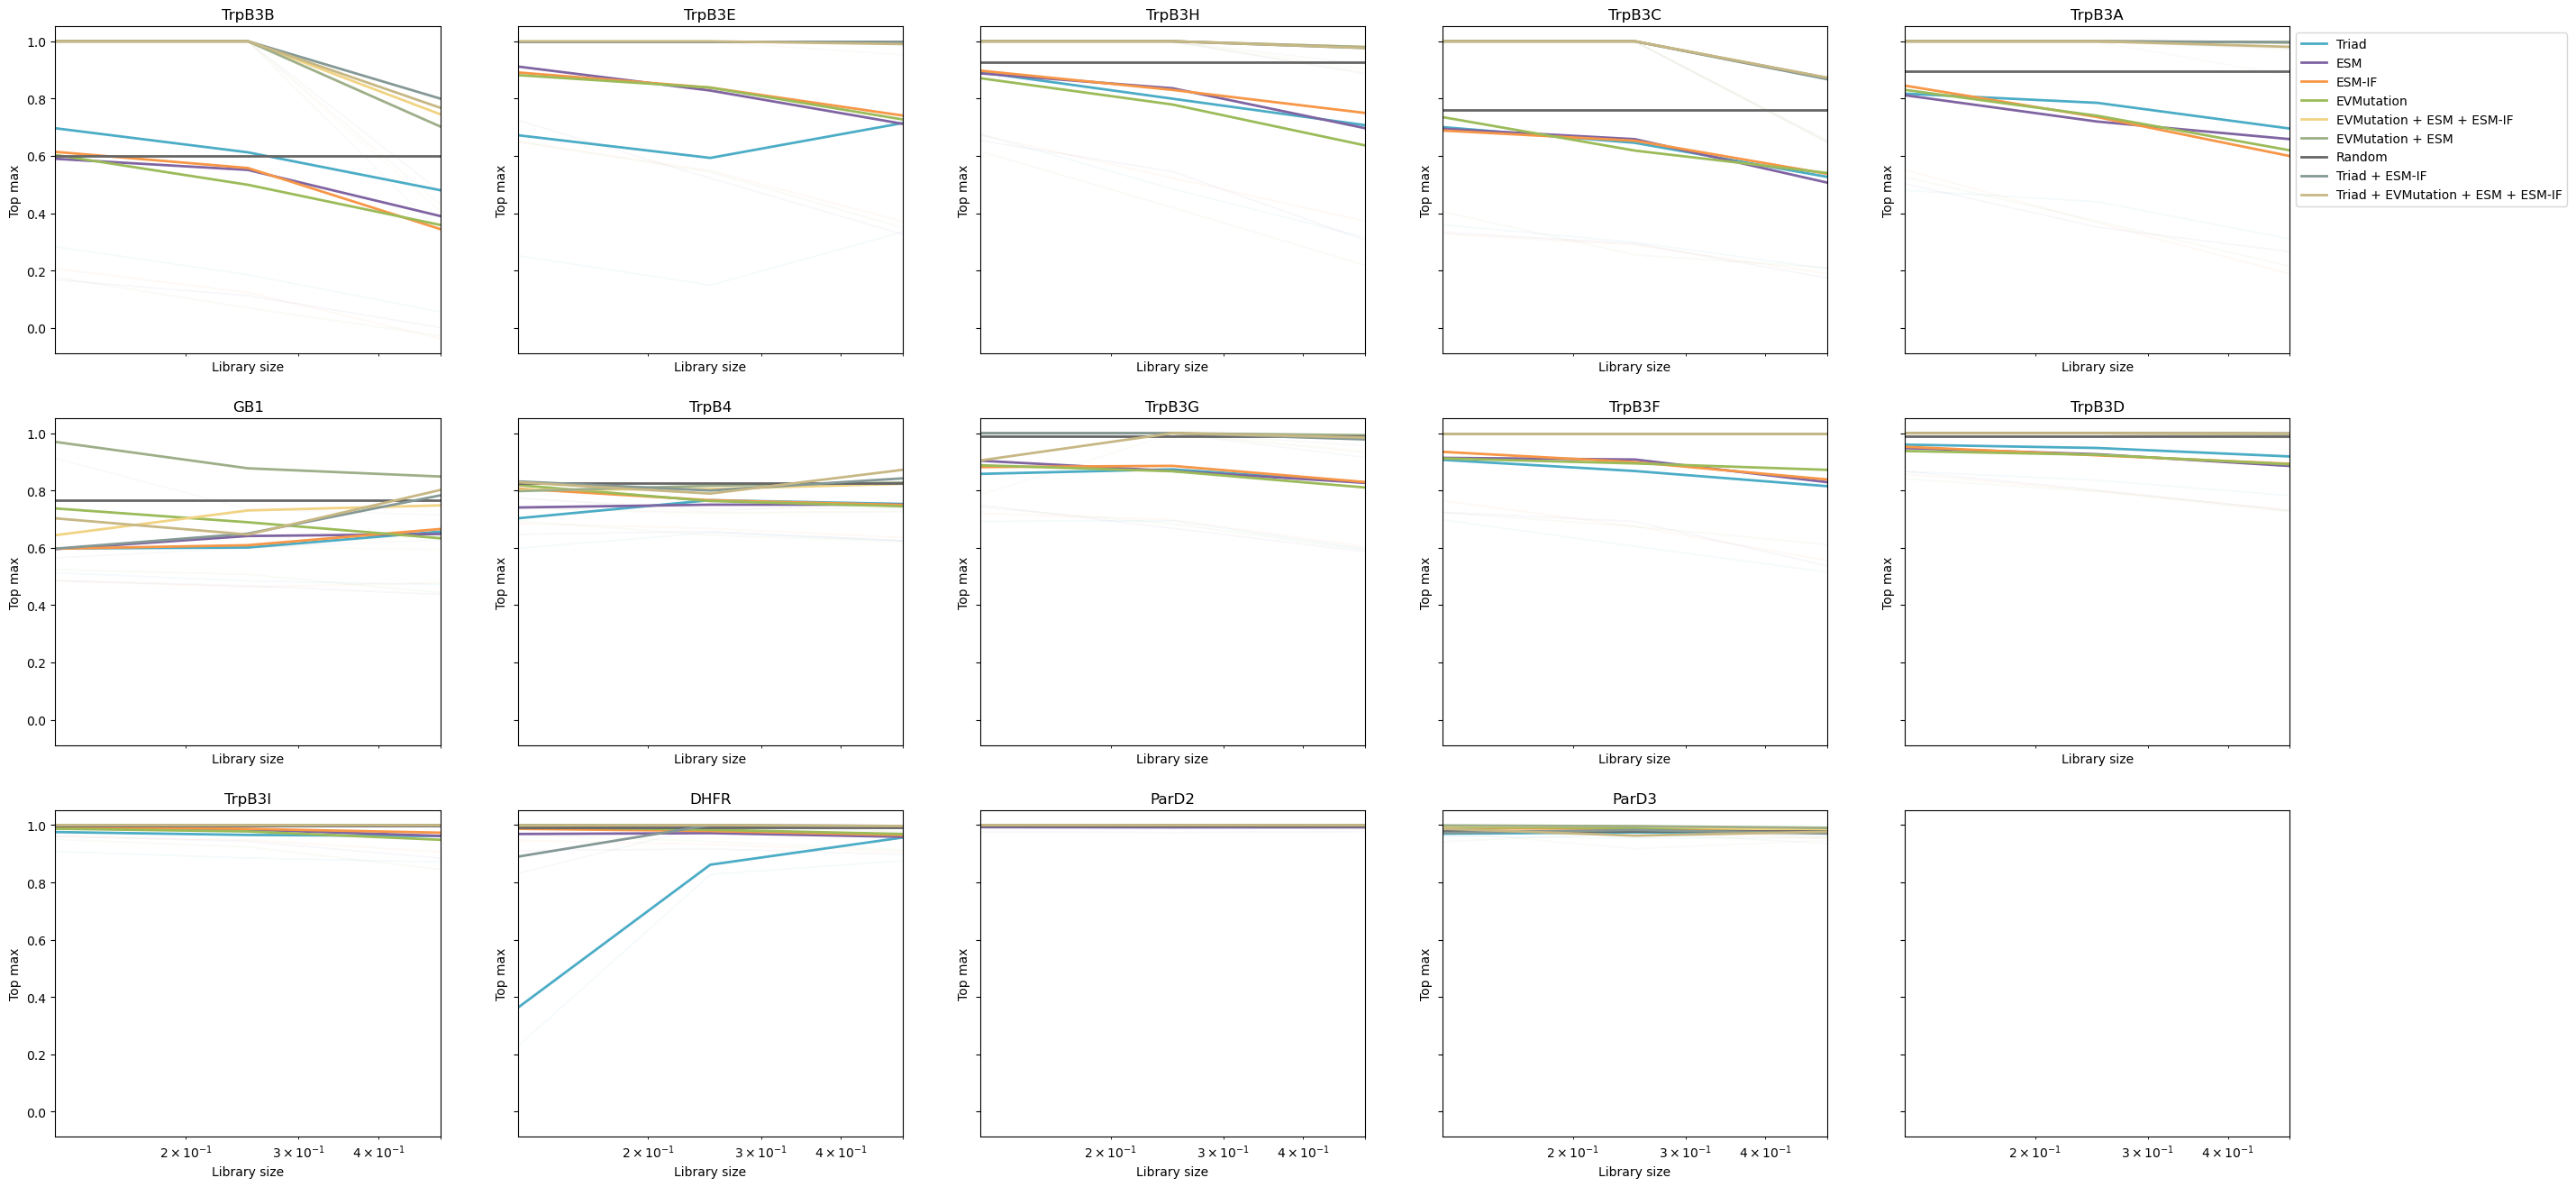

In [17]:
de_folder = "results/de/DE-active/scale2max"
liborderby = "single_step_DE"
de_sumdf = pd.read_csv(f"{de_folder}/all_landscape_de_summary.csv")
liborder = list(
    de_sumdf[de_sumdf["de_type"] == liborderby]
    .sort_values(by=["mean_all"])["lib"]
    .values
)

ncol = 5
nrow = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(32, 16), sharex=True, sharey=True)

for i, (ax, lib) in enumerate(zip(axs.flatten(), liborder)):

    ax.set_title(lib)

    # plt.title(f"Library: {lib}, Zeroing Strategy: {zs}")
    ax.set_xlabel("Library size")
    ax.set_ylabel("Top max")
    ax.set_xlim(0.125, 0.5)
    ax.set_xscale("log")

    lib_df = avg_df[avg_df["lib"] == lib].copy()

    lib_df["ft_lib"] = lib_df["ft_lib"].map(
        {
            numb: frac
            for numb, frac in zip(sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST)
        }
    )

    for zs in avg_df["zs"].unique():

        sub_df = lib_df[(lib_df["zs"] == zs)]

        if zs != "none":
            ax.plot(
                sub_df["ft_lib"],
                sub_df["mean"],
                color=ZS_COLOR_MAP[zs],
                label=ZS_OPTS_LEGEND[zs],
                linewidth=2,
            )
            ax.fill_between(
                sub_df["ft_lib"],
                sub_df["mean"] - sub_df["std"],
                sub_df["mean"] - sub_df["std"],
                color=ZS_COLOR_MAP[zs],
                alpha=0.05,
            )
        else:
            ax.axhline(
                sub_df["mean"].values,
                linestyle="solid",
                color=ZS_COLOR_MAP[zs],
                label=ZS_OPTS_LEGEND[zs],
                linewidth=2,
            )
            ax.fill_between(
                sub_df["ft_lib"],
                sub_df["mean"] - sub_df["std"],
                sub_df["mean"] - sub_df["std"],
                color=ZS_COLOR_MAP[zs],
                alpha=0.05,
            )

    if i == 4:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))